# Feature Engineering
## Kaggle Meetup Demo

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os

### Read data

In [2]:
data_path = "./data"
train_dataset = "train.csv"
test_dataset = "test.csv"
targe_column = "SalePrice"

train_dataframe = pd.read_csv(os.path.join(data_path, train_dataset))
test_dataframe = pd.read_csv(os.path.join(data_path, test_dataset))

### Information about the dataset
There are 1460 rows <br>
The train dataset contains 81 columns <br>
The test dataset contains 80 columns <br>
There are 43 categorical columns with string labels <br>
There are 18 categorical columns with integer labels <br>
<b>NOTE: categorical columns that contains more than 30 classes are considered continuous numeric features</b> <br>
NOTE: You can modify the threshold value if you are not satisfied with the results.<br>
There are 20 numeric columns with continuous values<br>

In [3]:
numerical = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


# get the target and use the log transformation
train_target = np.log(train_dataframe[targe_column])

# drop the target and id columns
train_dataframe = train_dataframe.drop([targe_column], axis=1)
train_id = train_dataframe.Id



### Preprocessing

In [4]:
from sklearn import preprocessing

def encoding_categorical_features(feature_name, dataset_list):
    """
    Encoding categorical features and save the labels of the categories to folder encoding_classes_labels. It is
    possible to use train data alone or all train data, validation data and test data. If all datesets are provided
    (i.e. train, valid and test), they will be concatenated first and then encoded.
    :param feature_name: string - will be used to name the file where the classes labels will be stored
    :param dataset_list: list of pandas series (i.e one column) that must contain the train data and optionally
     contains valid data and test data
    :return:
    """

    # concatenate dataset if needed
    print("the are {} datasets provided".format(len(dataset_list)))
    valid_dataset_list = [x for x in dataset_list if x.shape[0] > 0]

    if len(valid_dataset_list) > 1:
        X_orginal = pd.concat(valid_dataset_list, axis=0)
    else:
        X_orginal = dataset_list[0]

    train_data = dataset_list[0]
    # define the encoder
    le = preprocessing.LabelEncoder()
    le.fit(X_orginal.fillna(-999999))
    dataset_list = []
    for dataset_i in valid_dataset_list:
        dataset_list.append(le.transform(dataset_i.fillna(-999999)))

    lables_nr = len(list(le.classes_))
    print("the number of classes in {} feature is: {}".format(feature_name, lables_nr))
    return dataset_list, le

def standard_scale_nuermical_features(dataframe):
    scaler = preprocessing.StandardScaler().fit(dataframe)

    train_scaled = scaler.transform(dataframe)
    train_scaled[np.isnan(train_scaled)] = 0
    train_scaled = pd.DataFrame(train_scaled, columns=dataframe.columns)

    return train_scaled

train_dataframe_normalized = standard_scale_nuermical_features(train_dataframe[numerical])
train_dataframe[numerical] = train_dataframe_normalized
print(train_dataframe.shape)

(1460, 80)


In [5]:
train_dataframe[numerical].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-2.341924e-16,-4.202783e-17,1.032983e-15,4.518912e-15,2.547430e-16,1.505645e-17,1.653168e-16,-7.376139e-17,2.063038e-16,7.686013e-17,-3.269835e-17,-1.446332e-16,3.844565e-15,-2.022735e-17,2.190029e-16,3.357284e-17,1.379034e-16,1.199193e-16
std,9.072853e-01,1.000343e+00,1.000343e+00,1.000343e+00,9.975982e-01,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,9.721975e-01,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-2.020626e+00,-9.237292e-01,-3.287824e+00,-1.689368e+00,-5.728346e-01,-9.730182e-01,-2.886528e-01,-1.284176e+00,-2.411167e+00,-2.144172e+00,-7.951632e-01,-2.249120e+00,-3.180863e+00,-2.212963e+00,-7.521758e-01,-7.044833e-01,-3.593249e-01,-2.702084e-01
25%,-4.140106e-01,-2.969908e-01,-5.719226e-01,-8.656586e-01,-5.728346e-01,-9.730182e-01,-2.886528e-01,-7.793259e-01,-5.966855e-01,-7.261556e-01,-7.951632e-01,-7.347485e-01,-6.687864e-01,-6.479160e-01,-7.521758e-01,-7.044833e-01,-3.593249e-01,-2.702084e-01
50%,0.000000e+00,-1.040633e-01,5.737148e-02,4.425864e-01,-5.728346e-01,-1.319022e-01,-2.886528e-01,-2.031633e-01,-1.503334e-01,-1.956933e-01,-7.951632e-01,-9.797004e-02,0.000000e+00,3.284429e-02,-7.521758e-01,-3.270298e-01,-3.593249e-01,-2.702084e-01
75%,3.686993e-01,1.087080e-01,9.516316e-01,9.271216e-01,3.346047e-01,5.891327e-01,-2.886528e-01,5.450557e-01,5.491227e-01,5.915905e-01,8.731117e-01,4.974036e-01,9.113911e-01,4.820057e-01,5.886506e-01,3.221901e-01,-3.593249e-01,-2.702084e-01
max,1.000839e+01,2.051827e+01,1.282839e+00,1.217843e+00,8.266757e+00,1.140575e+01,8.851638e+00,4.004295e+00,1.152095e+01,9.132681e+00,3.936963e+00,7.855574e+00,1.276047e+00,4.421526e+00,6.087635e+00,7.554198e+00,8.675309e+00,8.341462e+00


### Featuretool

<img src=featuretool.png>

In [6]:
import featuretools as ft

### how does it work?
Generating fake data:

In [7]:
integer_array = np.random.randint(5, size=(100, 1))
integer_columns = [f"int_col_{x}" for x in range(integer_array.shape[1])]
continuous_array = np.random.randn(100, 5)
continuous_columns = [f"cont_col_{x}" for x in range(continuous_array.shape[1])]

integer_dataframe = pd.DataFrame(integer_array, columns=integer_columns)
continuous_dataframe = pd.DataFrame(continuous_array, columns=continuous_columns)

total_dataframe = pd.concat([continuous_dataframe, integer_dataframe], axis=1)
total_dataframe["Id"] = range(total_dataframe.shape[0])

In [8]:
print(total_dataframe.head())

   cont_col_0  cont_col_1  cont_col_2  cont_col_3  cont_col_4  int_col_0  Id
0    1.406992   -1.625066   -0.545548    0.109943    0.025338          2   0
1    1.529180   -0.524555    0.148821    0.356770    0.060462          0   1
2    0.650563   -2.319488   -1.010928    0.152293    0.303889          0   2
3   -1.630199   -0.130310    0.059638   -0.847878    1.515433          1   3
4   -0.361344   -1.443168    0.104868   -3.305410    0.581889          2   4


1. We create entityset (set of dataframes)
2. We use table Normalizing to create a new table
3. We apply deep feature synthesis

In [9]:
def automated_feature_extraction(dataframe_train, aggregate_features, max_depth):
    """

    :param dataframe_train: Pandas dataframe
    :param aggregate_features: list of strings - the categorical features that we use to apply premitives for generating
    new features
    :param max_depth: integer
    :return:
    """
    es = ft.EntitySet(id="Id")
    es = es.entity_from_dataframe(entity_id="dataframe_train",
                                  dataframe=dataframe_train, index="Id")
    
    for categ_i in aggregate_features:
        es.normalize_entity(base_entity_id='dataframe_train', new_entity_id=f'feature_{categ_i}',
                            index=categ_i)
    
    feature_matrix_train, _ = ft.dfs(entityset=es, target_entity='dataframe_train', max_depth=max_depth)
    
    return feature_matrix_train

### new feauture

In [10]:
new_total_dataframe = automated_feature_extraction(total_dataframe, ["int_col_0"], max_depth=2)
print(new_total_dataframe.shape)

(100, 37)


In [11]:
new_total_dataframe.columns[20:40]

Index(['feature_int_col_0.MAX(dataframe_train.cont_col_4)',
       'feature_int_col_0.SKEW(dataframe_train.cont_col_0)',
       'feature_int_col_0.SKEW(dataframe_train.cont_col_1)',
       'feature_int_col_0.SKEW(dataframe_train.cont_col_2)',
       'feature_int_col_0.SKEW(dataframe_train.cont_col_3)',
       'feature_int_col_0.SKEW(dataframe_train.cont_col_4)',
       'feature_int_col_0.MIN(dataframe_train.cont_col_0)',
       'feature_int_col_0.MIN(dataframe_train.cont_col_1)',
       'feature_int_col_0.MIN(dataframe_train.cont_col_2)',
       'feature_int_col_0.MIN(dataframe_train.cont_col_3)',
       'feature_int_col_0.MIN(dataframe_train.cont_col_4)',
       'feature_int_col_0.MEAN(dataframe_train.cont_col_0)',
       'feature_int_col_0.MEAN(dataframe_train.cont_col_1)',
       'feature_int_col_0.MEAN(dataframe_train.cont_col_2)',
       'feature_int_col_0.MEAN(dataframe_train.cont_col_3)',
       'feature_int_col_0.MEAN(dataframe_train.cont_col_4)',
       'feature_int_col_0.COUN

In [12]:
categorical_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
                       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                       'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

train_dataframe.index = range(train_dataframe.shape[0])

max_depth = 2
train_dataframe_list = []
for aggregate_feature in categorical_columns:
    numerical_columns = ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                         'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',
                         'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', aggregate_feature]

    train_dataframe_considered = train_dataframe[numerical_columns]

    dataset_list = []
    dataset_list.append(train_dataframe_considered[aggregate_feature].astype(str))

    dataset_list, class_labels = encoding_categorical_features(
        aggregate_feature, dataset_list)

    train_dataframe_considered[aggregate_feature] = dataset_list[0]

    feature_matrix_train = automated_feature_extraction(train_dataframe_considered, [aggregate_feature], max_depth)
    print(feature_matrix_train.columns[100:120])
    feature_matrix_train = feature_matrix_train.drop(numerical_columns[1:len(numerical_columns)-1], axis=1)

    columns = ['{}_{}'.format(aggregate_feature,x) for x in range(feature_matrix_train.shape[1])]
    feature_matrix_train.columns = columns
    feature_matrix_train.index = range(feature_matrix_train.shape[0])

    train_dataframe_list.append(feature_matrix_train)
print(feature_matrix_train.shape)

the are 1 datasets provided
the number of classes in MSSubClass feature is: 15
Index(['feature_MSSubClass.MIN(dataframe_train.1stFlrSF)',
       'feature_MSSubClass.MIN(dataframe_train.2ndFlrSF)',
       'feature_MSSubClass.MIN(dataframe_train.GrLivArea)',
       'feature_MSSubClass.MIN(dataframe_train.GarageYrBlt)',
       'feature_MSSubClass.MIN(dataframe_train.GarageArea)',
       'feature_MSSubClass.MIN(dataframe_train.WoodDeckSF)',
       'feature_MSSubClass.MIN(dataframe_train.OpenPorchSF)',
       'feature_MSSubClass.MIN(dataframe_train.EnclosedPorch)',
       'feature_MSSubClass.MIN(dataframe_train.ScreenPorch)',
       'feature_MSSubClass.MEAN(dataframe_train.LotFrontage)',
       'feature_MSSubClass.MEAN(dataframe_train.LotArea)',
       'feature_MSSubClass.MEAN(dataframe_train.YearBuilt)',
       'feature_MSSubClass.MEAN(dataframe_train.YearRemodAdd)',
       'feature_MSSubClass.MEAN(dataframe_train.MasVnrArea)',
       'feature_MSSubClass.MEAN(dataframe_train.BsmtFinSF1)',


Index(['feature_FullBath.MIN(dataframe_train.1stFlrSF)',
       'feature_FullBath.MIN(dataframe_train.2ndFlrSF)',
       'feature_FullBath.MIN(dataframe_train.GrLivArea)',
       'feature_FullBath.MIN(dataframe_train.GarageYrBlt)',
       'feature_FullBath.MIN(dataframe_train.GarageArea)',
       'feature_FullBath.MIN(dataframe_train.WoodDeckSF)',
       'feature_FullBath.MIN(dataframe_train.OpenPorchSF)',
       'feature_FullBath.MIN(dataframe_train.EnclosedPorch)',
       'feature_FullBath.MIN(dataframe_train.ScreenPorch)',
       'feature_FullBath.MEAN(dataframe_train.LotFrontage)',
       'feature_FullBath.MEAN(dataframe_train.LotArea)',
       'feature_FullBath.MEAN(dataframe_train.YearBuilt)',
       'feature_FullBath.MEAN(dataframe_train.YearRemodAdd)',
       'feature_FullBath.MEAN(dataframe_train.MasVnrArea)',
       'feature_FullBath.MEAN(dataframe_train.BsmtFinSF1)',
       'feature_FullBath.MEAN(dataframe_train.BsmtFinSF2)',
       'feature_FullBath.MEAN(dataframe_train.Bsm

Index(['feature_3SsnPorch.MIN(dataframe_train.1stFlrSF)',
       'feature_3SsnPorch.MIN(dataframe_train.2ndFlrSF)',
       'feature_3SsnPorch.MIN(dataframe_train.GrLivArea)',
       'feature_3SsnPorch.MIN(dataframe_train.GarageYrBlt)',
       'feature_3SsnPorch.MIN(dataframe_train.GarageArea)',
       'feature_3SsnPorch.MIN(dataframe_train.WoodDeckSF)',
       'feature_3SsnPorch.MIN(dataframe_train.OpenPorchSF)',
       'feature_3SsnPorch.MIN(dataframe_train.EnclosedPorch)',
       'feature_3SsnPorch.MIN(dataframe_train.ScreenPorch)',
       'feature_3SsnPorch.MEAN(dataframe_train.LotFrontage)',
       'feature_3SsnPorch.MEAN(dataframe_train.LotArea)',
       'feature_3SsnPorch.MEAN(dataframe_train.YearBuilt)',
       'feature_3SsnPorch.MEAN(dataframe_train.YearRemodAdd)',
       'feature_3SsnPorch.MEAN(dataframe_train.MasVnrArea)',
       'feature_3SsnPorch.MEAN(dataframe_train.BsmtFinSF1)',
       'feature_3SsnPorch.MEAN(dataframe_train.BsmtFinSF2)',
       'feature_3SsnPorch.MEAN(da

In [13]:
# brining all feature together in a dataframe
train_dataframe_list.append(train_dataframe[numerical_columns[1:len(numerical_columns)-1]])
feature_matrix_train = pd.concat(train_dataframe_list, axis=1,ignore_index=False)

In [14]:
feature_matrix_train.head()

,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,MSSubClass_9,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,9,104.286186,46.185660,230.021092,166.105438,126.677765,-2.042537,-34.615566,-2.487761,-17.357926,...,-0.459303,-0.793434,1.161852,0.370333,0.992426,0.351000,-0.752176,0.216503,-0.359325,-0.270208
1,4,133.479560,66.540728,118.819171,26.308138,1.969244,140.303209,84.455090,67.949014,245.359874,...,0.466465,0.257140,-0.795163,-0.482512,-0.101543,-0.060731,1.626195,-0.704483,-0.359325,-0.270208
2,9,104.286186,46.185660,230.021092,166.105438,126.677765,-2.042537,-34.615566,-2.487761,-17.357926,...,-0.313369,-0.627826,1.189351,0.515013,0.911391,0.631726,-0.752176,-0.070361,-0.359325,-0.270208
3,10,-9.958859,-2.385253,-104.200128,-20.347824,-33.132532,-34.430669,-15.086806,5.190162,-36.115801,...,-0.687324,-0.521734,0.937276,0.383659,0.789839,0.790804,-0.752176,-0.176048,4.092524,-0.270208
4,9,104.286186,46.185660,230.021092,166.105438,126.677765,-2.042537,-34.615566,-2.487761,-17.357926,...,0.199680,-0.045611,1.617877,1.299326,0.870874,1.698485,0.780197,0.563760,-0.359325,-0.270208


In [15]:
ft.list_primitives()[0:90]

,name,type,description
0,sum,aggregation,"Calculates the total addition, ignoring `NaN`."
1,std,aggregation,Computes the dispersion relative to the mean v...
2,avg_time_between,aggregation,Computes the average number of seconds between...
3,count,aggregation,"Determines the total number of values, excludi..."
4,median,aggregation,Determines the middlemost number in a list of ...
5,percent_true,aggregation,Determines the percent of `True` values.
6,num_unique,aggregation,"Determines the number of distinct values, igno..."
7,trend,aggregation,Calculates the trend of a variable over time.
8,min,aggregation,"Calculates the smallest value, ignoring `NaN` ..."
9,all,aggregation,Calculates if all values are 'True' in a list.


## Feature Selection

In [16]:
from sklearn.feature_selection import VarianceThreshold
def feature_selection(feature_matrix_train):
    sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
    feature_matrix_train_array = sel.fit_transform(feature_matrix_train.fillna(0).values)
    return feature_matrix_train_array

## Training the model with and without new feature

In [17]:
categorical_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
                       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                       'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
numerical_columns = ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                         'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',
                         'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']
all_columns = categorical_columns + numerical_columns

In [21]:
%%time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
best_score = 0.77

y_train = np.array(train_target)

#X_train_df = train_dataframe[numerical_columns] # numeric features (baseline model) 77
#X_train_df = train_dataframe[categorical_columns] # categorical features 81.5
#X_train_df = train_dataframe[all_columns] # both numerical and categorical features
X_train_df = feature_matrix_train.fillna(0) # Featuretool features

# normalize data again
X_train_df = standard_scale_nuermical_features(X_train_df)

print("size of features before feature selection", X_train_df.shape)
# apply feature selection
X_train_df = feature_selection(X_train_df)
print("size of features after feature selection", X_train_df.shape)

train_array = X_train_df

for regul in range(1,1000):
    linear_regression_model = linear_model.Ridge(alpha=regul)

    predictions = 0
    n_fold = 5  # number of folds
    kfold = KFold(n_splits=n_fold, shuffle=True, random_state=1)

    fold_nr = 0  # counter for identifying models
    r2_linear = 0

    for train, test in kfold.split(train_array):
        fold_nr += 1
        #print("foldnr.", fold_nr)
        linear_regression_model.fit(train_array[train], y_train[train])

        y_pred_linear = linear_regression_model.predict(train_array[test])

        #print("Mean squared error linear: %.2f"
         #     % mean_squared_error(y_train[test], y_pred_linear))

        #print('R2 linear: %.2f' % r2_score(y_train[test], y_pred_linear))

        r2_linear += r2_score(y_train[test], y_pred_linear)

    # mean R2
    #print(r2_linear/n_fold)
    if r2_linear/n_fold > best_score:
        best_score = r2_linear/n_fold
        print(f"alpha = {regul}",f"the current R2 = {round(100*best_score,3)}")

size of features before feature selection (1460, 1998)
size of features after feature selection (1460, 1882)
alpha = 1 the current R2 = 80.858
alpha = 2 the current R2 = 81.568
alpha = 3 the current R2 = 82.04
alpha = 4 the current R2 = 82.38
alpha = 5 the current R2 = 82.638
alpha = 6 the current R2 = 82.84
alpha = 7 the current R2 = 83.002
alpha = 8 the current R2 = 83.134
alpha = 9 the current R2 = 83.245
alpha = 10 the current R2 = 83.338
alpha = 11 the current R2 = 83.419
alpha = 12 the current R2 = 83.488
alpha = 13 the current R2 = 83.549
alpha = 14 the current R2 = 83.603
alpha = 15 the current R2 = 83.651
alpha = 16 the current R2 = 83.694
alpha = 17 the current R2 = 83.733
alpha = 18 the current R2 = 83.768
alpha = 19 the current R2 = 83.8
alpha = 20 the current R2 = 83.83
alpha = 21 the current R2 = 83.857
alpha = 22 the current R2 = 83.882
alpha = 23 the current R2 = 83.905
alpha = 24 the current R2 = 83.927
alpha = 25 the current R2 = 83.947
alpha = 26 the current R2 = 83.

alpha = 230 the current R2 = 84.673
alpha = 231 the current R2 = 84.674
alpha = 232 the current R2 = 84.675
alpha = 233 the current R2 = 84.676
alpha = 234 the current R2 = 84.677
alpha = 235 the current R2 = 84.678
alpha = 236 the current R2 = 84.679
alpha = 237 the current R2 = 84.68
alpha = 238 the current R2 = 84.681
alpha = 239 the current R2 = 84.681
alpha = 240 the current R2 = 84.682
alpha = 241 the current R2 = 84.683
alpha = 242 the current R2 = 84.684
alpha = 243 the current R2 = 84.685
alpha = 244 the current R2 = 84.686
alpha = 245 the current R2 = 84.687
alpha = 246 the current R2 = 84.688
alpha = 247 the current R2 = 84.689
alpha = 248 the current R2 = 84.69
alpha = 249 the current R2 = 84.691
alpha = 250 the current R2 = 84.692
alpha = 251 the current R2 = 84.692
alpha = 252 the current R2 = 84.693
alpha = 253 the current R2 = 84.694
alpha = 254 the current R2 = 84.695
alpha = 255 the current R2 = 84.696
alpha = 256 the current R2 = 84.697
alpha = 257 the current R2 = 8

alpha = 459 the current R2 = 84.779
alpha = 460 the current R2 = 84.779
alpha = 461 the current R2 = 84.779
alpha = 462 the current R2 = 84.779
alpha = 463 the current R2 = 84.78
alpha = 464 the current R2 = 84.78
alpha = 465 the current R2 = 84.78
alpha = 466 the current R2 = 84.78
alpha = 467 the current R2 = 84.78
alpha = 468 the current R2 = 84.78
alpha = 469 the current R2 = 84.78
alpha = 470 the current R2 = 84.78
alpha = 471 the current R2 = 84.78
alpha = 472 the current R2 = 84.78
alpha = 473 the current R2 = 84.78
alpha = 474 the current R2 = 84.78
alpha = 475 the current R2 = 84.781
alpha = 476 the current R2 = 84.781
alpha = 477 the current R2 = 84.781
alpha = 478 the current R2 = 84.781
alpha = 479 the current R2 = 84.781
alpha = 480 the current R2 = 84.781
alpha = 481 the current R2 = 84.781
alpha = 482 the current R2 = 84.781
alpha = 483 the current R2 = 84.781
alpha = 484 the current R2 = 84.781
alpha = 485 the current R2 = 84.781
alpha = 486 the current R2 = 84.781
alph

## Feature transformation:

In [22]:
X = np.array(range(1,1001))
y = np.log(X) + np.random.randn(1000)

In [23]:
print(X.shape)
print(y.shape)

(1000,)
(1000,)


In [24]:
print("the correlation between the feature x and the target y ->", np.corrcoef(X,y)[0][1])

the correlation between the feature x and the target y -> 0.5972085998953457


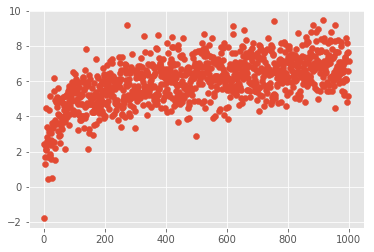

In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(X, y)
plt.show()

In [27]:
print("original->", np.corrcoef(X,y)[0][1])
print("log->",np.corrcoef(np.log(X),y)[0][1])
print("X**2->", np.corrcoef(X**2,y)[0][1])
print("X**3->", np.corrcoef(X**3,y)[0][1])
print("X**4->", np.corrcoef(X**4,y)[0][1])
print("X**0.5->",np.corrcoef(X**0.5,y)[0][1])
print("X**0.25->",np.corrcoef(X**0.25,y)[0][1])
print("X**0.05 ->",np.corrcoef(X**0.05,y)[0][1])
print("X**0.005 ->",np.corrcoef(X**0.005,y)[0][1])

original-> 0.5972085998953457
log-> 0.6870000635729883
X**2-> 0.5142824686285609
X**3-> 0.45662166005315064
X**4-> 0.4144113021253784
X**0.5-> 0.64941480886364
X**0.25-> 0.6738098603108392
X**0.05 -> 0.6860487733550451
X**0.005 -> 0.6869568851704839


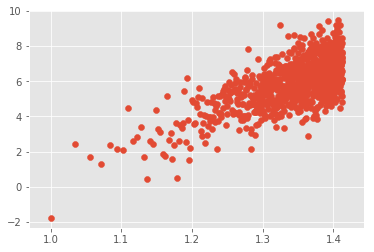

In [28]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(X**0.05, y)
plt.show()

<img src="latex_300.png">
<img src="latex_log.png">


In [29]:
def apply_transformation(dataframe, train_target):
    """
    Apply transformation on features and calculate the correlation with the target
    :param dataframe: pandas dataframe
    :param train_target: pandas series
    :return: pandas dataframe contains the correlation between each feature and the target for different
     applied transformations
    """
    # remove negative values and zeros to avoid math problem
    for col_i in dataframe.columns:
        dataframe[col_i] += abs(min(dataframe[col_i])) + 1

    # 1 means the original values. If the type is number, it means x^number
    transformation_type = [1, "log", 0.25, 0.5, 0.75, 2, 3, 4]
    correlation_dataframe = pd.DataFrame(columns=[str(x) for x in transformation_type])

    for trans_i in transformation_type:
        if trans_i == "log":
            print("Appying the log transformation to the given dataset")
            dataframe_trans = np.log(dataframe)
        else:
            if trans_i != 1:
                print("Appying the x**{} transformation to the given dataset".format(trans_i))
            dataframe_trans = (dataframe) ** trans_i

        correlation_dataframe[str(trans_i)] = [round(np.corrcoef([dataframe_trans[x], train_target])[0][1], 2)
                                          for x in dataframe.columns]

        correlation_dataframe.index = dataframe.columns
    return correlation_dataframe

In [30]:
apply_transformation(train_dataframe[numerical], train_target)

Appying the log transformation to the given dataset
Appying the x**0.25 transformation to the given dataset
Appying the x**0.5 transformation to the given dataset
Appying the x**0.75 transformation to the given dataset
Appying the x**2 transformation to the given dataset
Appying the x**3 transformation to the given dataset
Appying the x**4 transformation to the given dataset


,1,log,0.25,0.5,0.75,2,3,4
LotFrontage,0.34,0.35,0.35,0.35,0.35,0.24,0.13,0.06
LotArea,0.26,0.39,0.37,0.34,0.30,0.12,0.08,0.07
YearBuilt,0.59,0.53,0.55,0.56,0.58,0.61,0.63,0.63
YearRemodAdd,0.57,0.56,0.56,0.56,0.57,0.56,0.55,0.54
MasVnrArea,0.43,0.44,0.44,0.44,0.44,0.36,0.27,0.19
BsmtFinSF1,0.37,0.33,0.34,0.35,0.37,0.31,0.13,0.04
BsmtFinSF2,0.00,-0.02,-0.01,-0.01,-0.00,0.03,0.05,0.06
BsmtUnfSF,0.22,0.20,0.20,0.21,0.22,0.24,0.26,0.26
TotalBsmtSF,0.61,0.60,0.61,0.62,0.62,0.50,0.28,0.12
1stFlrSF,0.60,0.61,0.61,0.61,0.60,0.52,0.37,0.20


In [32]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


train_dataframe_ = train_dataframe[all_columns]

#+
train_dataframe_["LotArea"] = np.log(train_dataframe["LotArea"] + abs(min(train_dataframe["LotArea"])) + 1)
#+
train_dataframe_["YearBuilt"] = (train_dataframe["YearBuilt"] + abs(min(train_dataframe["YearBuilt"])) + 1)**2
#-
#train_dataframe_["BsmtFinSF2"] = (train_dataframe["BsmtFinSF2"] + abs(min(train_dataframe["BsmtFinSF2"])) + 1)**4
#train_dataframe_["BsmtUnfSF"] = (train_dataframe["BsmtUnfSF"] + abs(min(train_dataframe["BsmtUnfSF"])) + 1)**3
#train_dataframe_["2ndFlrSF"] = (train_dataframe["2ndFlrSF"] + abs(min(train_dataframe["2ndFlrSF"])) + 1)**3

#+
train_dataframe_["GrLivArea"] = np.log(train_dataframe["GrLivArea"] + abs(min(train_dataframe["GrLivArea"])) + 1)

#-
# train_dataframe_["GarageYrBlt"] = (train_dataframe["GarageYrBlt"] + abs(min(train_dataframe["GarageYrBlt"])) + 1)**4

#+
train_dataframe_["WoodDeckSF"] = np.log(train_dataframe["WoodDeckSF"] + abs(min(train_dataframe["WoodDeckSF"])) + 1)
train_dataframe_["OpenPorchSF"] = np.log(train_dataframe["OpenPorchSF"] + abs(min(train_dataframe["OpenPorchSF"])) + 1)

#-
#train_dataframe_["EnclosedPorch"] = np.log(train_dataframe["EnclosedPorch"] + abs(min(train_dataframe["EnclosedPorch"])) + 1)

train_dataframe_ = standard_scale_nuermical_features(train_dataframe_)

train_array = train_dataframe_
print("size of features before feature selection", train_array.shape)
# apply feature selection
train_array = feature_selection(train_array)
print("size of features after feature selection", train_array.shape)


y_train = np.array(train_target)



predictions = 0
n_fold = 5  # number of folds
kfold = KFold(n_splits=n_fold, shuffle=True, random_state=1)
best_score = 0.77

for regul in range(1,2000):
    linear_regression_model = linear_model.Ridge(alpha=regul)
        
    fold_nr = 0  # counter for identifying models
    r2_linear = 0
    mse = 0

    for train, test in kfold.split(train_array):
        fold_nr += 1
        #print("foldnr.", fold_nr)
        linear_regression_model.fit(train_array[train], y_train[train])

        y_pred_linear = linear_regression_model.predict(train_array[test])

        #print("Mean squared error linear: %.4f"
        #      % mean_squared_error(y_train[test], y_pred_linear))

        #print('R2 linear: %.1f' % round(100*r2_score(y_train[test], y_pred_linear),1))

        r2_linear += r2_score(y_train[test], y_pred_linear)
        mse += mean_squared_error(y_train[test], y_pred_linear)

    # mean R2
    if r2_linear/n_fold > best_score:
        best_score = r2_linear/n_fold
        print("mean R2 5 Folds: ", round(100*r2_linear/n_fold,2), f"alpha = {regul}")
        print("mean MSE 5 Folds: ", round(mse/n_fold,4))

size of features before feature selection (1460, 37)
size of features after feature selection (1460, 37)
mean R2 5 Folds:  85.85 alpha = 1
mean MSE 5 Folds:  0.0229
mean R2 5 Folds:  85.86 alpha = 2
mean MSE 5 Folds:  0.0229
mean R2 5 Folds:  85.86 alpha = 3
mean MSE 5 Folds:  0.0228
mean R2 5 Folds:  85.87 alpha = 4
mean MSE 5 Folds:  0.0228
mean R2 5 Folds:  85.88 alpha = 5
mean MSE 5 Folds:  0.0228
mean R2 5 Folds:  85.88 alpha = 6
mean MSE 5 Folds:  0.0228
mean R2 5 Folds:  85.88 alpha = 7
mean MSE 5 Folds:  0.0228
mean R2 5 Folds:  85.88 alpha = 8
mean MSE 5 Folds:  0.0228
mean R2 5 Folds:  85.88 alpha = 9
mean MSE 5 Folds:  0.0228
mean R2 5 Folds:  85.89 alpha = 10
mean MSE 5 Folds:  0.0228
mean R2 5 Folds:  85.89 alpha = 11
mean MSE 5 Folds:  0.0228


## Feature Mapping

linear model <br>
<img src="latex_linear_model.png">
After mapping features <br>
<img src="latex_linear_model_mapping_features.png">

In [33]:
def features_mapping(numpy_array, map_degree=2, terms_mix_degree=2, features_numbers_list=[]):
    """
    this function introduces the possible nonlinearity and dependency between the independent features. For example
    if we have 2 features x1 and x2, after applying the function, we get the following features if the map_degree = 2
    x1, x2, x1^2, x2^2, x1*x2
    it is important to apply the map_features_test function after applying this function to be sure that the test data
    are mapped exactly as the train datasets
    :param numpy_array: numpy arrary with size (nxm) where n is the number of rows and m is the number of the features
    :param map_degree: the nonlinearity degree. For example map_degree = 2 --> x and x^2 will be considered. If
     map_degree = 3 --> x, x^2 and x^3 will be considered. If 0 is passed, this type of nonlinearity will be not
     considered
    :param terms_mix_degree: the degree of the introduced dependency between features.
    For example, if mix_degree = 2 --> x1, x2, x3, x1*x2 x1*x3 and x2*x3 will be considered.
     If mix_degree = 3 -> x1, x2, x3, x1*x2 x1*x3, x2*x3, x1*x2*x3. If 0 is passed, this type of nonlinearity will not
     be considered
    :param features_numbers_list: list of integers that represents the features that should be considered by applying
    this function. if not passed, all features will be considered. For example, if there is 3 features x1, x2, x3 which
     has the following order indexes [0, 1, 2] in dataframe, and features_numbers_list = [1, 2] are passed, then only
     x2 and x3 (dataframe[:,1], dataframe[:,2]) will be considered when applying the function.
    :return: numpy array contain the original features and the new created terms.
    the terms from the second nonlinearity type (i.e. x1*x2, x1*x3,... etc)
    """
    # consider only the required features when applying the function
    if len(features_numbers_list) == 0:
        features_numbers_list = list(range(numpy_array.shape[1]))
    # initiate the list that contains the shapes which used to combine the features e.g. x1*x2
    terms_shape_list = []
    # applying the first nonlinearity which means x**degree e.g. x**2, x**3 and so on.
    if map_degree > 1:
        for degree_i in range(2, map_degree + 1):
            # appending the features to the original array
            numpy_array = np.concatenate((numpy_array, numpy_array[:, features_numbers_list] ** degree_i), axis=1)
    # apply the second nonlinearity type which means introducing the dependency relationship like x1*x2
    if terms_mix_degree > 1:
        for mix_degree_i in range(2, terms_mix_degree + 1):
            if map_degree > 1:
                # in this case we don't miss terms like x2*x1**2 (x2*x1^2)
                mapping_shape = list(it.combinations_with_replacement(range(features_numbers_list[0],
                                                                            features_numbers_list[-1] + 1),
                                                                      mix_degree_i))
            else:
                # we don't include the first type of nonlinearity like x1**2 (x1^2)
                mapping_shape = list(
                    it.combinations(range(features_numbers_list[0], features_numbers_list[-1] + 1), mix_degree_i))
            for mapping_shape_i in mapping_shape:
                if len(set(mapping_shape_i)) > 1:
                    # initiate the term that should be calculated
                    term_i = np.ones((len(numpy_array), 1))
                    for feature_i in mapping_shape_i:
                        # x1*x2*x3...
                        term_i[:, 0] = np.multiply(term_i[:, 0], numpy_array[:, feature_i])
                    # appending the features to the original array
                    numpy_array = np.append(numpy_array.T, term_i.reshape(1, -1), axis=0).T
                    # store the terms for the investigation
                    terms_shape_list.append(mapping_shape_i)
    return numpy_array, terms_shape_list


def apply_mapping_features(dataframes_list, map_degree, terms_mix_degree, features_numbers_list):
    """
    Appying the features_mapping function
    :param dataframes_list: a list of pandas dataframe. e.g. [train, test]
    :param map_degree: the nonlinearity degree. For example map_degree = 2 --> x and x^2 will be considered. If
     map_degree = 3 --> x, x^2 and x^3 will be considered. If 0 is passed, this type of nonlinearity will be not
     considered
    :param terms_mix_degree: the nonlinearity degree. For example map_degree = 2 --> x and x^2 will be considered. If
     map_degree = 3 --> x, x^2 and x^3 will be considered. If 0 is passed, this type of nonlinearity will be not
     considered
    :param features_numbers_list: list of integers that represents the features that should be considered by applying
    this function.
    :return:
    """
    if map_degree > 0 and terms_mix_degree > 1:
        print("applying features mapping --> map_degree = {}, terms_mix_degree = {},"
              " features_numbers_list = {}".format(map_degree, terms_mix_degree, features_numbers_list))
        mapped_dataframes_list = []

        # applying the mapping features function to each dataframe inside the list
        for dataset in dataframes_list:
            mapped_dataset, _ = features_mapping(dataset.values, map_degree=map_degree,
                                                 terms_mix_degree=terms_mix_degree,
                                                 features_numbers_list=features_numbers_list)

            # Prepare the results as dataframes and give names to the columns
            mapped_dataframe = pd.DataFrame(mapped_dataset)
            mapped_dataframe.columns = ["col_{}".format(x) for x in range(mapped_dataset.shape[1])]

            # store the results
            mapped_dataframes_list.append(mapped_dataframe)

        return mapped_dataframes_list
    else:
        return dataframes_list

In [39]:
import itertools as it

map_degree = 3
terms_mix_degree = 2
features_numbers_list = []

datasets_list = [train_dataframe[numerical]]
mapped_features_datasets = apply_mapping_features(datasets_list,
                                                  map_degree,
                                                  terms_mix_degree,
                                                  features_numbers_list)

applying features mapping --> map_degree = 3, terms_mix_degree = 2, features_numbers_list = []


In [40]:
mapped_features_datasets[0].head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_197,col_198,col_199,col_200,col_201,col_202,col_203,col_204,col_205,col_206
0,-0.208034,-0.207142,1.050994,0.878668,0.510015,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,-0.264014,0.075993,-0.126123,-0.094843,-0.162848,0.270276,0.203244,-0.077795,-0.058501,0.097093
1,0.409895,-0.091886,0.156734,-0.429577,-0.572835,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,-0.098760,0.042784,0.021822,0.016410,-1.145627,-0.584332,-0.439411,0.253138,0.190357,0.097093
2,-0.084449,0.073480,0.984752,0.830215,0.322174,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,-0.475169,-0.044449,-0.226995,-0.170698,0.052924,0.270276,0.203244,0.025283,0.019012,0.097093
3,-0.414011,-0.096897,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,-0.594824,-0.139220,3.236385,-0.213682,0.132419,-3.078297,0.203244,-0.720482,0.047570,-1.105834
4,0.574676,0.375148,0.951632,0.733308,1.360826,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,1.325153,0.957538,-0.610308,-0.458945,0.439844,-0.280344,-0.210816,-0.202573,-0.152333,0.097093


In [41]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
best_score = 0.0


X_train_df = pd.concat([mapped_features_datasets[0],train_dataframe[categorical_columns]],axis=1)
#X_train_df = mapped_features_datasets[0]
X_train_df = standard_scale_nuermical_features(X_train_df)


train_array = X_train_df
print("size of features before feature selection", train_array.shape)
# apply feature selection
train_array = feature_selection(train_array)
print("size of features after feature selection", train_array.shape)


y_train = np.array(train_target)
y_train = y_train.reshape(y_train.shape[0], 1)

for regul in range(1,1000):
    linear_regression_model = linear_model.Ridge(alpha=regul)

    predictions = 0
    n_fold = 5  # number of folds
    kfold = KFold(n_splits=n_fold, shuffle=True, random_state=1)

    fold_nr = 0  # counter for identifying models
    r2_linear = 0

    for train, test in kfold.split(train_array):
        fold_nr += 1
        #print("foldnr.", fold_nr)
        linear_regression_model.fit(train_array[train], y_train[train])

        y_pred_linear = linear_regression_model.predict(train_array[test])

        #print("Mean squared error linear: %.2f"
         #     % mean_squared_error(y_train[test], y_pred_linear))

        #print('R2 linear: %.2f' % r2_score(y_train[test], y_pred_linear))

        r2_linear += r2_score(y_train[test], y_pred_linear)

    # mean R2
    #print(r2_linear/n_fold)
    if r2_linear/n_fold > best_score:
        best_score = r2_linear/n_fold
        print(f"alpha = {regul}", f"R2 = {round(100*best_score,3)}")

size of features before feature selection (1460, 225)
size of features after feature selection (1460, 225)
alpha = 1 R2 = 72.981
alpha = 2 R2 = 74.556
alpha = 3 R2 = 75.368
alpha = 4 R2 = 76.058
alpha = 5 R2 = 76.687
alpha = 6 R2 = 77.266
alpha = 7 R2 = 77.798
alpha = 8 R2 = 78.288
alpha = 9 R2 = 78.738
alpha = 10 R2 = 79.153
alpha = 11 R2 = 79.537
alpha = 12 R2 = 79.892
alpha = 13 R2 = 80.223
alpha = 14 R2 = 80.53
alpha = 15 R2 = 80.817
alpha = 16 R2 = 81.085
alpha = 17 R2 = 81.336
alpha = 18 R2 = 81.572
alpha = 19 R2 = 81.794
alpha = 20 R2 = 82.003
alpha = 21 R2 = 82.2
alpha = 22 R2 = 82.386
alpha = 23 R2 = 82.563
alpha = 24 R2 = 82.73
alpha = 25 R2 = 82.889
alpha = 26 R2 = 83.04
alpha = 27 R2 = 83.184
alpha = 28 R2 = 83.32
alpha = 29 R2 = 83.451
alpha = 30 R2 = 83.576
alpha = 31 R2 = 83.695
alpha = 32 R2 = 83.809
alpha = 33 R2 = 83.918
alpha = 34 R2 = 84.023
alpha = 35 R2 = 84.123
alpha = 36 R2 = 84.219
alpha = 37 R2 = 84.312
alpha = 38 R2 = 84.401
alpha = 39 R2 = 84.486
alpha = 40 

In [37]:
datasets_list = [train_dataframe_[numerical]]
mapped_features_datasets_ = apply_mapping_features(datasets_list,
                                                  map_degree,
                                                  terms_mix_degree,
                                                  features_numbers_list)

applying features mapping --> map_degree = 2, terms_mix_degree = 2, features_numbers_list = []


In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
best_score = 0.77


X_train_df = pd.concat([mapped_features_datasets_[0],train_dataframe[categorical_columns]],axis=1)
#X_train_df = mapped_features_datasets[0]
X_train_df = standard_scale_nuermical_features(X_train_df)


train_array = X_train_df
print("size of features before feature selection", train_array.shape)
# apply feature selection
train_array = feature_selection(train_array)
print("size of features after feature selection", train_array.shape)


y_train = np.array(train_target)
y_train = y_train.reshape(y_train.shape[0], 1)

for regul in range(1,1000):
    linear_regression_model = linear_model.Ridge(alpha=regul)

    predictions = 0
    n_fold = 5  # number of folds
    kfold = KFold(n_splits=n_fold, shuffle=True, random_state=1)

    fold_nr = 0  # counter for identifying models
    r2_linear = 0

    for train, test in kfold.split(train_array):
        fold_nr += 1
        #print("foldnr.", fold_nr)
        linear_regression_model.fit(train_array[train], y_train[train])

        y_pred_linear = linear_regression_model.predict(train_array[test])

        #print("Mean squared error linear: %.2f"
         #     % mean_squared_error(y_train[test], y_pred_linear))

        #print('R2 linear: %.2f' % r2_score(y_train[test], y_pred_linear))

        r2_linear += r2_score(y_train[test], y_pred_linear)

    # mean R2
    #print(r2_linear/n_fold)
    if r2_linear/n_fold > best_score:
        best_score = r2_linear/n_fold
        print(f"alpha = {regul}", f"R2 = {round(100*best_score,3)}")

size of features before feature selection (1460, 207)
size of features after feature selection (1460, 207)
alpha = 1 R2 = 84.506
alpha = 2 R2 = 84.615
alpha = 3 R2 = 84.741
alpha = 4 R2 = 84.869
alpha = 5 R2 = 84.995
alpha = 6 R2 = 85.117
alpha = 7 R2 = 85.235
alpha = 8 R2 = 85.348
alpha = 9 R2 = 85.455
alpha = 10 R2 = 85.558
alpha = 11 R2 = 85.655
alpha = 12 R2 = 85.748
alpha = 13 R2 = 85.837
alpha = 14 R2 = 85.922
alpha = 15 R2 = 86.003
alpha = 16 R2 = 86.08
alpha = 17 R2 = 86.153
alpha = 18 R2 = 86.224
alpha = 19 R2 = 86.291
alpha = 20 R2 = 86.355
alpha = 21 R2 = 86.417
alpha = 22 R2 = 86.476
alpha = 23 R2 = 86.532
alpha = 24 R2 = 86.587
alpha = 25 R2 = 86.639
alpha = 26 R2 = 86.689
alpha = 27 R2 = 86.737
alpha = 28 R2 = 86.783
alpha = 29 R2 = 86.828
alpha = 30 R2 = 86.871
alpha = 31 R2 = 86.912
alpha = 32 R2 = 86.952
alpha = 33 R2 = 86.99
alpha = 34 R2 = 87.027
alpha = 35 R2 = 87.063
alpha = 36 R2 = 87.097
alpha = 37 R2 = 87.13
alpha = 38 R2 = 87.163
alpha = 39 R2 = 87.194
alpha = 